In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

import itertools 

import warnings
warnings.filterwarnings('ignore')

# flight delays

1. All flights out of 3 DC airports (WAS)    
2. into 3 NYC airports    
3. not cancelled    
4. flights in January 2004    
    
## Data labels:

+ CRS_DEP_TIME   	 scheduled departure time
+ CARRIER   		 The airline
+ DEP_TIME   	 	 Actual departure time
+ DEST   		     Destination airport in NY: Kennedy (JFK), LaGuardia (LGA), Newark (EWR)
+ DISTANCE   	 	 Flight distance in miles
+ FL_DATE   		 Flight date
+ FL_NUM   		 Flight number
+ ORIGIN   		 Departure airport in Washingon DC: National (DCA), Baltimore-Washington (BWI), Dulles (IAD)
+ Weather   		 Whether the weather was inclement (1) or not (0)
+ DAY_WEEK   	 	 Day of week. 1=Mon, 2=Tues...
+ DAY_OF_MONTH   	 
+ TAIL_NUM   	 	 This number is airplane specific
+ Flight Status    Whether the flight was delayed or on time (defined as arriving within 15 min of scheduled time)
<br>
<br>
<br>
+ Carrier Code    Carrier Name
+ AA   	 	American Airlines, Inc.
+ CO   	 	Continental Air Lines, Inc.
+ DH   	 	Atlantic Coast Airlines
+ DL   	 	Delta Air Lines, Inc.
+ EV   	 	Atlantic Southeast Airlines
+ FL   	 	Airtran Airways Corporation
+ MQ   	 	American Eagle Airlines,inc
+ OH   	 	Comair, Inc.
+ RU   	 	Continental Express Airline
+ UA   	 	United Air Lines, Inc.
+ US   	 	US Airways, Inc.

In [2]:
df = pd.read_csv('FlightDelays.csv')
df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   CARRIER        2201 non-null   object
 2   DEP_TIME       2201 non-null   int64 
 3   DEST           2201 non-null   object
 4   DISTANCE       2201 non-null   int64 
 5   FL_DATE        2201 non-null   object
 6   FL_NUM         2201 non-null   int64 
 7   ORIGIN         2201 non-null   object
 8   Weather        2201 non-null   int64 
 9   DAY_WEEK       2201 non-null   int64 
 10  DAY_OF_MONTH   2201 non-null   int64 
 11  TAIL_NUM       2201 non-null   object
 12  Flight Status  2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB


In [4]:
for x in df.columns:
        print('-'*50)
        print(df.groupby([x]).size())

--------------------------------------------------
CRS_DEP_TIME
600      26
630      57
640      22
645      21
700      92
730      24
735      17
759       2
800      40
830      26
840      62
845       3
850      31
900      77
925       3
930      28
1000     23
1030     56
1039      6
1040     15
1100     48
1130     20
1200     22
1230     28
1240     31
1245     61
1300    109
1315      4
1330     19
1359     25
1400     46
1430     52
1455    138
1500     77
1515      5
1520      1
1525     21
1530     50
1600     45
1605      1
1610     24
1630     51
1640     27
1645     30
1700     74
1710     28
1715     61
1720     27
1725      1
1730     50
1800     27
1830     58
1900     99
1930     20
2000     22
2030     31
2100     45
2120     90
2130      2
dtype: int64
--------------------------------------------------
CARRIER
CO     94
DH    551
DL    388
MQ    295
OH     30
RU    408
UA     31
US    404
dtype: int64
--------------------------------------------------
DEP_TIME
10 

In [5]:
for x in ['CRS_DEP_TIME','DEP_TIME']:
    df[x]=[round(t / 100) for t in df[x]]

In [6]:
for x in df.columns:
    if df[x].dtype =='int64':
        df[x]=df[x].astype('category')

In [7]:
df.columns

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'Flight Status'],
      dtype='object')

In [8]:
#delays_df['Flight Status'] = delays_df['Flight Status'].astype('category')


predictors = ['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', ]
#outcome = 'Flight Status'

X = pd.get_dummies(df[predictors])
y = df['Flight Status']
#classes = list(y.cat.categories)

In [9]:
# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

# run naive Bayes
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)

# predict probabilities
predProb_train = delays_nb.predict_proba(X_train)
predProb_valid = delays_nb.predict_proba(X_valid)

# predict class membership
y_valid_pred = delays_nb.predict(X_valid)
y_train_pred = delays_nb.predict(X_train)

In [10]:
predProb_valid

array([[4.85116122e-01, 5.14883878e-01],
       [8.54087997e-04, 9.99145912e-01],
       [5.13739596e-02, 9.48626040e-01],
       ...,
       [1.38437602e-01, 8.61562398e-01],
       [1.07978291e-02, 9.89202171e-01],
       [4.98891019e-01, 5.01108981e-01]])

In [11]:
df_valid=pd.DataFrame()
df_valid['class']=y_valid
df_valid['proba']=predProb_valid[:,1]
df_valid['y_true']=[1 if p == 'ontime' else 0 for p in df_valid['class']]
df_valid['y_pred']=[1 if p > 0.5 else 0 for p in df_valid.proba]

In [12]:
df_valid

,class,proba,y_true,y_pred
1276,ontime,0.514884,1,1
1446,ontime,0.999146,1,1
335,ontime,0.948626,1,1
1458,ontime,0.995347,1,1
2038,ontime,0.985080,1,1
...,...,...,...,...
460,ontime,0.670600,1,1
2063,ontime,0.812265,1,1
159,ontime,0.861562,1,1
2027,delayed,0.989202,0,1


In [13]:
cm=confusion_matrix(y_valid,y_valid_pred)
cm

array([[ 90,  77],
       [ 94, 620]], dtype=int64)

In [14]:
true_positive=cm[1][1]
print("true positive: "+str(true_positive))

false_positive=cm[0][1]
print('false positive: '+str(false_positive))

false_negative=cm[1][0]
print('false negative: '+str(false_negative))

true_negative=cm[0][0]
print('true negative: '+str(true_negative))

true positive: 620
false positive: 77
false negative: 94
true negative: 90


In [15]:
print(accuracy_score(df_valid['y_true'],df_valid['y_pred']))

print((true_positive+true_negative)/df_valid['class'].count())

0.8059023836549376
0.8059023836549376


In [16]:
#precision / positive predictive value
print(precision_score(df_valid['y_true'],df_valid['y_pred']))

print(true_positive / (true_positive + false_positive))

0.8895265423242468
0.8895265423242468


In [17]:
#recall / sensitivity
print(recall_score(df_valid['y_true'],df_valid['y_pred']))

print(true_positive / (true_positive + false_negative))

0.8683473389355743
0.8683473389355743


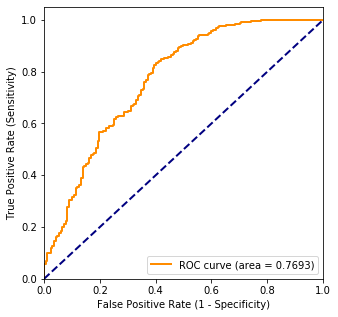

In [18]:
fpr, tpr, _ = roc_curve(df_valid.y_true, df_valid.proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

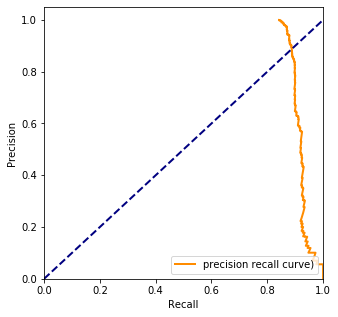

In [19]:
precision_recall_curve(df_valid.y_true, df_valid.proba)

precision, recall, _ = precision_recall_curve(df_valid.y_true, df_valid.proba)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(precision, recall, color='darkorange',
         lw=lw, label='precision recall curve)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")

plt.show()

In [20]:
f1_score(df_valid.y_true, df_valid.y_pred)

0.878809355067328

In [21]:
#use probability
log_loss(df_valid['y_true'],df_valid['proba'])

0.4883799300457799

+ ID   		 	 Customer ID
+    Age   		 Customer's age in completed years
+    Experience   	 #years of professional experience
+    Income   		 Annual income of the customer (000) 
+    ZIPCode   		 Home Address ZIP code.
+    Family   		 Family size of the customer
+    CCAvg   		 Avg. spending on credit cards per month (000)
+    Education   	 	 Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
+    Mortgage   	 	 Value of house mortgage if any. (000)
+    Personal Loan   	 Did this customer accept the personal loan offered in the last campaign?
+    Securities Account   Does the customer have a securities account with the bank?
+    CD Account   	 Does the customer have a certificate of deposit (CD) account with the bank?
+    Online   		 Does the customer use internet banking facilities?
+    CreditCard   	 Does the customer use a credit card issued by UniversalBank?


In [22]:
df = pd.read_csv('UniversalBank.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [23]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [24]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [25]:
df=df.drop(['ID', 'ZIP_Code'], axis=1)

In [26]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [27]:
df.groupby('Education').size()

Education
1    2096
2    1403
3    1501
dtype: int64

In [28]:
df['Education'] = df['Education'].astype('category')
new_categories = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
df.Education.cat.rename_categories(new_categories, inplace=True)
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Advanced/Professional
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0


In [29]:
y = df['Personal_Loan']
X = df.drop(columns=['Personal_Loan'])

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  -12.105194006575854
            Age  Experience    Income    Family     CCAvg  Mortgage  \
coeff -0.051667    0.052952  0.058676  0.609565  0.240421   0.00101   

       Securities_Account  CD_Account    Online  CreditCard  \
coeff           -1.030108    3.648152 -0.678944   -0.961048   

       Education_Graduate  Education_Advanced/Professional  
coeff             4.19873                         4.358777  


In [30]:
logit_reg_proba = logit_reg.predict_proba(valid_X)

df_valid=pd.DataFrame()
df_valid['class']=valid_y
df_valid['prob_0']=logit_reg_proba[:,0]
df_valid['prob_1']=logit_reg_proba[:,1]
df_valid['y_pred']=[1 if p > 0.5 else 0 for p in df_valid.prob_1]
df_valid

,class,prob_0,prob_1,y_pred
2764,0,0.975938,0.024062,0
4767,0,0.999937,0.000063,0
3814,0,0.999898,0.000102,0
3499,0,0.998403,0.001597,0
2735,0,0.956154,0.043846,0
...,...,...,...,...
4372,0,0.996094,0.003906,0
3401,0,0.999629,0.000371,0
1239,0,0.999785,0.000215,0
437,0,0.998501,0.001499,0


In [31]:
#recall / sensitivity
print(recall_score(df_valid['class'],df_valid['y_pred']))

0.6632124352331606


In [32]:
def findsubsets(s, n): 
    return list(map(set, itertools.combinations(s, n)))

In [33]:
def exhaustive(model,train_X,train_y,valid_X,valid_y):
    recall_last=0
    
    for x in range(len(train_X.columns),0,-1):
        n=x
        #print("number of features "+str(n))
        ss=findsubsets(train_X.columns,n)
        print("_"*50)
        print(str(len(ss))+" model(s) using "+ str(n)+ " features")
        for z in range(0,len(ss)):
        
            logit_reg  = model.fit(train_X[ss[z]], train_y)   
            logit_reg_pred = logit_reg.predict(train_X[ss[z]])
            
            
            recall_new = recall_score(train_y,logit_reg_pred)
        
            if recall_new > recall_last:
                recall_last=recall_new
                recall_last_features=list(ss[z])
                print("_"*50)
                print(recall_last_features)
                print("recall: "+str(recall_last))
                
                print("_"*50)

In [34]:
exhaustive(model=LogisticRegression(penalty="l2",C=1e12 ,solver='lbfgs',n_jobs=-1), train_X=train_X, train_y=train_y,valid_X=valid_X,valid_y=valid_y )


__________________________________________________
1 model(s) using 12 features
__________________________________________________
['Online', 'Education_Advanced/Professional', 'Age', 'CD_Account', 'Education_Graduate', 'Family', 'CreditCard', 'Securities_Account', 'CCAvg', 'Mortgage', 'Income', 'Experience']
recall: 0.6829268292682927
__________________________________________________
__________________________________________________
12 model(s) using 11 features
__________________________________________________
['Online', 'Education_Advanced/Professional', 'Age', 'CD_Account', 'Education_Graduate', 'Family', 'CreditCard', 'Securities_Account', 'CCAvg', 'Income', 'Experience']
recall: 0.6898954703832753
__________________________________________________
__________________________________________________
['Online', 'Education_Advanced/Professional', 'Age', 'CD_Account', 'Education_Graduate', 'Family', 'CreditCard', 'Securities_Account', 'CCAvg', 'Mortgage', 'Income']
recall: 0.693379

In [35]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e12, solver='lbfgs',n_jobs=-1)

cols=['Online', 'Education_Advanced/Professional', 'Age', 'Education_Graduate', 'Family', 
      'Securities_Account', 'CCAvg', 'Mortgage', 'Income']

logit_reg.fit(train_X[cols], train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=cols).transpose())

logit_reg_proba = logit_reg.predict_proba(valid_X[cols])

df_valid=pd.DataFrame()
df_valid['class']=valid_y
df_valid['prob_0']=logit_reg_proba[:,0]
df_valid['prob_1']=logit_reg_proba[:,1]
df_valid['y_pred']=[1 if p > 0.5 else 0 for p in df_valid.prob_1]
df_valid

intercept  -12.577605178095405
         Family  CreditCard    Income  Education_Advanced/Professional  \
coeff  0.585968   -1.415336  0.063241                         4.070572   

       CD_Account  Experience   Online  Education_Graduate  Securities_Account  
coeff    4.648309   -0.006496 -0.80737            4.043766           -2.010051  


,class,prob_0,prob_1,y_pred
2764,0,0.982987,0.017013,0
4767,0,0.999956,0.000044,0
3814,0,0.999827,0.000173,0
3499,0,0.996792,0.003208,0
2735,0,0.962107,0.037893,0
...,...,...,...,...
4372,0,0.995592,0.004408,0
3401,0,0.999790,0.000210,0
1239,0,0.999873,0.000127,0
437,0,0.999180,0.000820,0


In [36]:
cm=confusion_matrix(df_valid['class'],df_valid['y_pred'])
print(cm)

true_positive=cm[1][1]
print("true positive: "+str(true_positive))

false_positive=cm[0][1]
print('false positive: '+str(false_positive))

false_negative=cm[1][0]
print('false negative: '+str(false_negative))

true_negative=cm[0][0]
print('true negative: '+str(true_negative))

print('-'*50)
print("accuracy")
print(accuracy_score(df_valid['class'],df_valid['y_pred']))

print((true_positive+true_negative)/df_valid['class'].count())
print('-'*50)

print("precision")
#precision / positive predictive value
print(precision_score(df_valid['class'],df_valid['y_pred']))

print(true_positive / (true_positive + false_positive))

print('-'*50)

print("recall")
#recall / sensitivity
print(recall_score(df_valid['class'],df_valid['y_pred']))

print(true_positive / (true_positive + false_negative))

print('-'*50)



[[1789   18]
 [  61  132]]
true positive: 132
false positive: 18
false negative: 61
true negative: 1789
--------------------------------------------------
accuracy
0.9605
0.9605
--------------------------------------------------
precision
0.88
0.88
--------------------------------------------------
recall
0.6839378238341969
0.6839378238341969
--------------------------------------------------


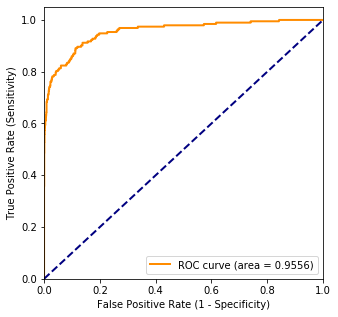

In [37]:
fpr, tpr, _ = roc_curve(df_valid['class'], df_valid['prob_1'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

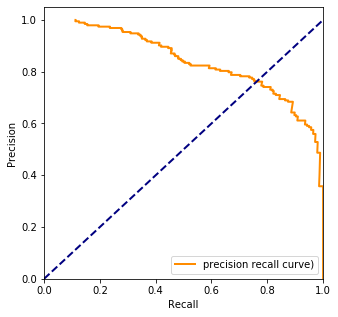

In [38]:
precision_recall_curve(df_valid['class'], df_valid.prob_1)

precision, recall, _ = precision_recall_curve(df_valid['class'], df_valid.prob_1)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(precision, recall, color='darkorange',
         lw=lw, label='precision recall curve)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")

plt.show()